# Clusterização com K-Means, DBSCAN e Mean Shift

In [ ]:
!pip install plotly==4.1.0

In [1]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np

In [2]:
df = pd.read_csv('Wine.csv',sep=',')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Po', 'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio','Total_Phenols' : 'Total_Fenois',
                          'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides','Color_Intensity':'Intensidade_de_cor'})

Fazendo uma análise preliminar dos dados

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcool,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Po,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinidade_po,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesio,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Fenois,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Fenois_nao_flavalonoides,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Intensidade_de_cor,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


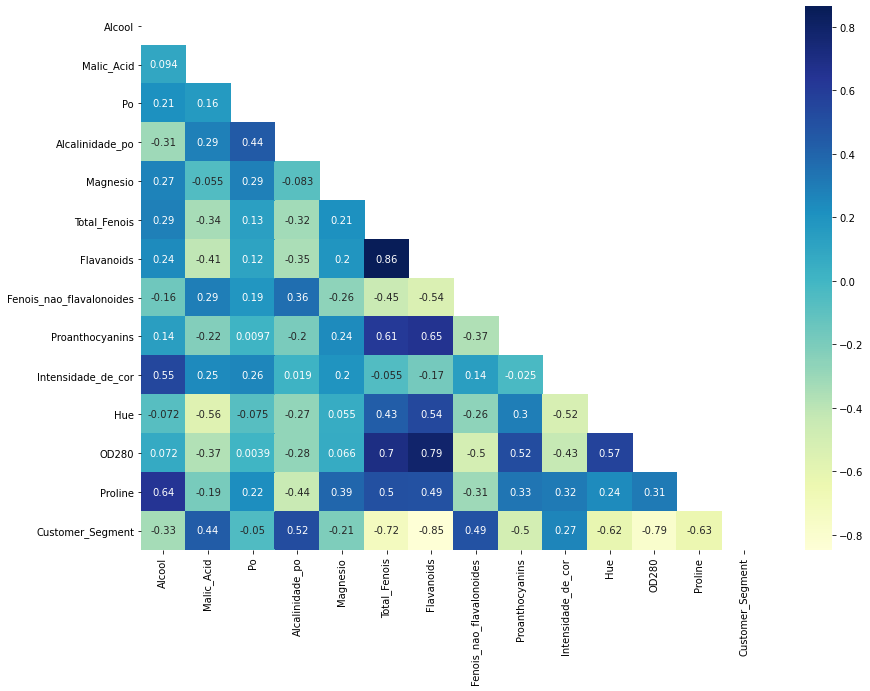

In [6]:
plt.figure(figsize=(14,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

Normalizando os dados

In [7]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)

In [8]:
df = pd.DataFrame(np_df, columns = df.columns)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcool,178.0,0.518584,0.213639,0.0,0.350658,0.531579,0.696711,1.0
Malic_Acid,178.0,0.315484,0.220780,0.0,0.170455,0.222332,0.462945,1.0
Po,178.0,0.538244,0.146708,0.0,0.454545,0.534759,0.640374,1.0
Alcalinidade_po,178.0,0.458502,0.172142,0.0,0.340206,0.458763,0.561856,1.0
Magnesio,178.0,0.323278,0.155244,0.0,0.195652,0.304348,0.402174,1.0
Total_Fenois,178.0,0.453487,0.215811,0.0,0.262931,0.474138,0.627586,1.0
Flavanoids,178.0,0.356386,0.210730,0.0,0.182489,0.378692,0.534810,1.0
Fenois_nao_flavalonoides,178.0,0.437460,0.234818,0.0,0.264151,0.396226,0.580189,1.0
Proanthocyanins,178.0,0.372523,0.180555,0.0,0.264984,0.361199,0.485804,1.0
Intensidade_de_cor,178.0,0.322363,0.197806,0.0,0.165529,0.290956,0.419795,1.0


# Clusterizando

Definindo o melhor número de clusters

In [10]:
from sklearn.cluster import KMeans

#  Silhouette

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
def melhor_numero_clusters(df,n1,n2):
  clusters = []
  scores = []
  for nc in range(n1, n2):
      kmeans = KMeans(n_clusters=nc)
      kmeans.fit(df)
      labels = kmeans.labels_
      ss=silhouette_score(df, labels)
      clusters.append(nc)
      scores.append(ss)
      melhor_score = max(scores)
      n = scores.index(melhor_score)
      numero = clusters[n]
  return (numero,melhor_score)

In [13]:
melhor_numero_clusters(df,2,11)

(3, 0.36950618492736303)

In [14]:
for nc in range(2, 11):
  print('Numero de Clusters', nc)
  kmeans = KMeans(n_clusters=nc)
  kmeans.fit(df)
  labels = kmeans.labels_
  ss=silhouette_score(df, labels)
  print('Silhouette Score', ss)
  print('='*80)

Numero de Clusters 2
Silhouette Score 0.3450438553643069
Numero de Clusters 3
Silhouette Score 0.36950618492736303
Numero de Clusters 4
Silhouette Score 0.3045648004609689
Numero de Clusters 5
Silhouette Score 0.29861768877455525
Numero de Clusters 6
Silhouette Score 0.14283613352963317
Numero de Clusters 7
Silhouette Score 0.13119020401249615
Numero de Clusters 8
Silhouette Score 0.2286234334210589
Numero de Clusters 9
Silhouette Score 0.14456538176701816
Numero de Clusters 10
Silhouette Score 0.1645376181034656


# Elbow Method

In [15]:
def kmeans(n, df):
    modelo = KMeans(n_clusters = n)
    modelo.fit(df)
    return [n, modelo.inertia_]

In [16]:
resultado = [kmeans(n, df) for n in range(2, 11)]

In [17]:
resultado = pd.DataFrame( resultado,
            columns=['grupos','inercia'])

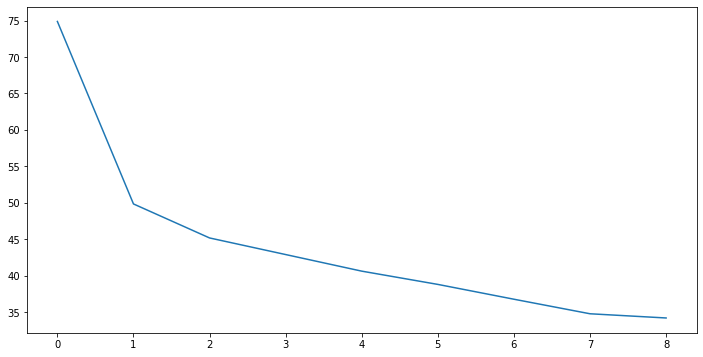

In [18]:
resultado.inercia.plot(figsize=(12,6));

In [ ]:
# df['cluster'] = labels

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels = kmeans.labels_

# Visualizando os clusters

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'], y=df['Alcool'],
              mode='markers',
              marker=dict(color=labels),
              text = labels ))

fig.show()

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                           y=df['Alcool'],
                           z=df['Proline'],
                           mode='markers',
                           marker=dict(color = kmeans.labels_.astype(np.float)),
                           text = labels ))


# fig = go.Figure()
# fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
#                          y = df['Alcool'], z = df['Proline'],
#                          mode = 'markers',                      
#                           marker = dict(color = agrupador.labels_.astype(np.float)),
#                         text = [0, 1, 2]))
fig.show()
fig.show()

In [47]:
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Álcool',
                    zaxis_title='Proline'))
fig.show()

In [31]:
# import plotly.express as px

# fig = px.scatter_3d(df, x='Intensidade_de_cor', y='Alcool', z='Proline',)
# fig.show()

In [33]:
centros = pd.DataFrame(kmeans.cluster_centers_)
centros.columns = df.columns
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
1,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
2,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000


In [35]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],
                           y = centros['Alcool'],
                           z=centros['Proline'],
                           mode = 'markers',                  
                           marker = dict(color = 'red'),
                           text = [0, 1, 2]))
fig.show()

In [36]:
# def plot_segmento(x,y,data):
#     sns.set(palette='muted',color_codes=True, style='whitegrid')
#     plt.figure(figsize=(7,5))
#     sns.scatterplot(x=x,y=y,hue='cluster',data=data, size='cluster',sizes=(50,150))
#     plt.show()
    
# plot_segmento('Intensidade_de_cor','Alcool',df)

# DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
dbscan = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')

In [39]:
dbscan.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [45]:
labels = dbscan.labels_+1
print(labels)

[1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 2 2 0 2 2 2 0 0
 0 0 0 0 0 2 2 0 2 0 0 0 0 0 2 0 0 0 0 0 3 0 3 0 3 0 0 3 0 0 3 0 0 3 3 0 3
 3 3 0 0 0 3 0 3 3 0 0 0 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3]


In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                           y=df['Alcool'],
                           z = df['Proline'],
                           mode='markers',                      
                           marker=dict(color =labels.astype(np.float)),
                           text=labels))
fig.show()